In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import warnings

warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/chess/games.csv


In [2]:
# Caminho até o arquivo CSV a ser usado
chess_filepath = '/kaggle/input/chess/games.csv'
# Lê o arquivo
chess_data = pd.read_csv(chess_filepath)

# Informações básicas sobre o dataset

In [3]:
# Primeiras linhas
chess_data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
# Informações sobre as colunas e seus tipos
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
# Algumas medidas estatísticas básicas
chess_data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


Essas medidas descritivas básicas nos ajudam a entender melhor os dados com os quais estamos lidando. Podemos saber, por exemplo, qual a faixa de rating dos jogadores, tendo a disposição o mínimo (min) e o máximo (max). Se, por exemplo, alguém que não entende de xadrez pegar esses dados para analisar, saberá qual é a "ordem de grandeza" do rating.

# Perguntas

Com base no que pôde ser observado no dataset a partir dos códigos acima, algumas questões podem ser levantadas sobre ele. As perguntas que devem ser respondidas ao final desta análise são:

* Quais são as maiores causas de vitórias nas partidas (xeque-mate, desistência, etc.)?
* As pessoas preferem jogar partidas com ou sem rating?
* O meu rating está acima da média?


# Status de Vitória

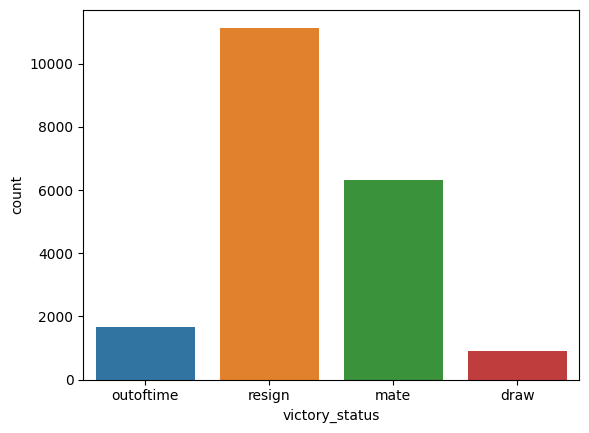

In [6]:
sns.countplot(x=chess_data['victory_status']);

Podemos perceber que a imensa maioria das partidas termina em desistência. Isso é devido ao fato de que sempre que o jogo ja está perdido os adversários desistem, sem deixar que a partida chegue no xeque-mate.

# Com ou sem rating?

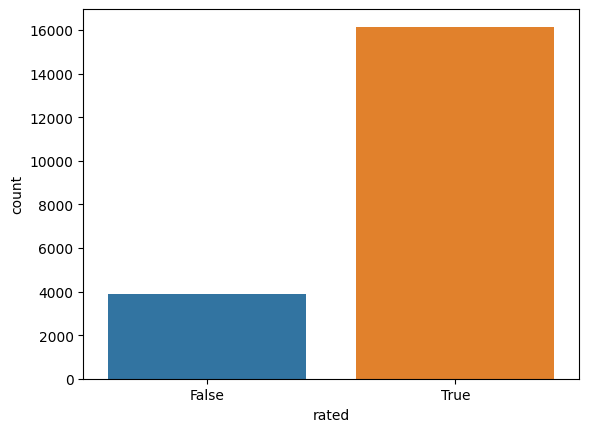

In [7]:
sns.countplot(x=chess_data['rated']);

Vemos que as pessoas preferem, de longe, jogar partidas valendo rating. A quantidade de partidas com rating é cerca de 4 vezes maior do que sem rating.

# Distribuição dos Ratings

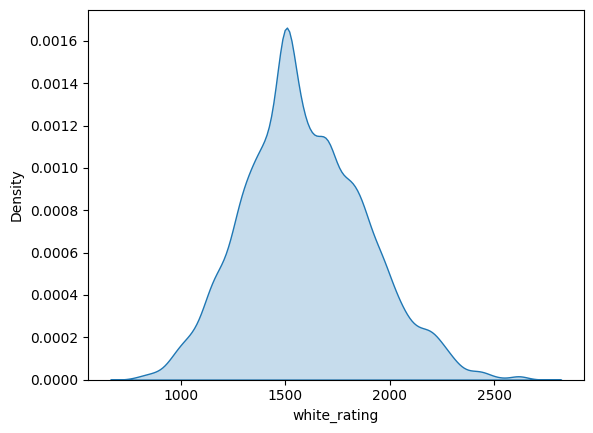

In [8]:
sns.kdeplot(data=chess_data['white_rating'], shade=True);

Podemos ver que o rating de brancas segue uma distribuição normal de probabilidade, com média de, aproximadamente, 1500, o que, obviamente, se confirma com a tabela que plotamos acima. O rating de pretas tende a seguir a mesma distribuição, já que os sites de xadrez emparceiram jogadores com ratings parecidos. Podemos confirmar isso com o código a seguir.

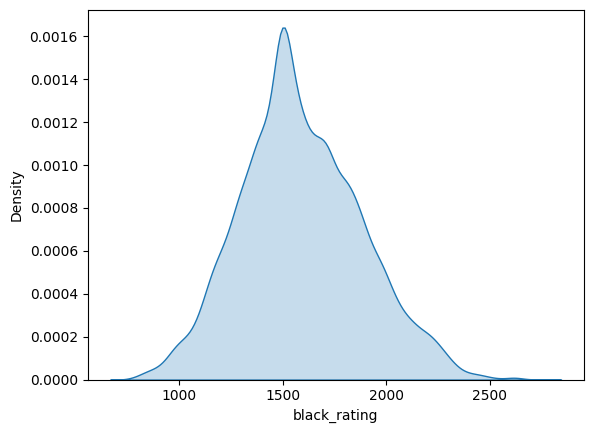

In [9]:
sns.kdeplot(data=chess_data['black_rating'], shade=True);

Com isso, conclui-se que meu rating está na média, uma vez que tenho cerca de 1500 de rating no Lichess (não sou tão ruim quanto eu pensava).